In [ ]:
'''
uploading ZipDigits.train files
'''

from google.colab import files
uploaded = files.upload()

Saving ZipDigits.train to ZipDigits.train


In [ ]:
'''
uploading ZipDigits.test files
'''

from google.colab import files
uploaded = files.upload()

Saving ZipDigits.test to ZipDigits.test


In [ ]:
'''
Dependencies
'''
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from itertools import permutations, combinations_with_replacement
import copy

In [ ]:
'''
Reading the MNIST/USPS Handwritten Digits Dataset
'''


def readData(fname='ZipDigits.train'):
    '''
    Input:
        fname: name of file containing N examples, each with d attributes
    Output:
        X: N x d+1 numpy array
        y: N x 1 numpy array
    '''
    with open(fname) as f:
        X = []
        y = []
        rlines = f.readlines()
        for line in rlines:
            row = line.rstrip().split(' ')
            yval = int(float(row[0]))
            y.append(yval)
            xvals = [float(pixel) for pixel in row[1:]]
            X.append(xvals)
        X = np.array(X)
        y = np.array(y)
        y = y.reshape((y.shape[0], 1))
        print(f'X shape: {X.shape}')
        print(f'y shape: {y.shape}')
        return X, y

Xdigitstrain, ydigitstrain = readData('ZipDigits.train')

Ndigitstrain, pixels = Xdigitstrain.shape

assert(Ndigitstrain == ydigitstrain.shape[0])

print(f'Xdigitstrain shape {Xdigitstrain.shape}, ydigitstrain shape {ydigitstrain.shape}')

X shape: (7291, 256)
y shape: (7291, 1)
Xdigitstrain shape (7291, 256), ydigitstrain shape (7291, 1)


In [ ]:
Xdigitstest, ydigitstest = readData('ZipDigits.test')

Ndigitstest, pixels = Xdigitstest.shape

assert(Ndigitstest == ydigitstest.shape[0])

print(f'Xdigitstest shape {Xdigitstest.shape}, ydigitstest shape {ydigitstest.shape}')

X shape: (2007, 256)
y shape: (2007, 1)
Xdigitstest shape (2007, 256), ydigitstest shape (2007, 1)


**Combining** test and training dataset into a **single dataset**

In [ ]:
import numpy as np

# Combine the training and test data
combined_X = np.concatenate([Xdigitstrain, Xdigitstest], axis=0)
combined_y = np.concatenate([ydigitstrain, ydigitstest], axis=0)

print(f'Combined X shape: {combined_X.shape}')
print(f'Combined y shape: {combined_y.shape}')


Combined X shape: (9298, 256)
Combined y shape: (9298, 1)


## Feature Normalization

### Compute 'Augmented' Feature Matrix

In [ ]:
'''
Computing Features
'''


def computeIntensity(X):
    '''
    Compute the average intensity feature
    Input:
        X: a 2 dimensional N x 256 numpy array
           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit
           each pixel has an intensity value between -1 and 1
    Output:
        intensities: a 2 dimensional N x 1 numpy array
                     each row consists of a single value representing the
                     average pixel intesity of the corresponding image
                     See LFD Example 3.1
    '''
    print('computing intensity feature')
    N, d = X.shape
    print(f'Input shape {N}, {d}')
    intensities = np.matmul(X, np.ones((d, 1)))/d
    print(f'Output shape {intensities.shape}')
    return intensities


def computeSymmetry(X):
    '''
    Compute the symmetry feature
    Input:
        X: a 2 dimensional N x 256 numpy array
           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit
           each pixel has an intensity value between -1 and 1
    Output:
        symmetries: a 2 dimensional N x 1 numpy array
                     each row consists of a single value representing the
                     "horizontal" symmetry of the 16 x 16 image about the vertical axis
                     See LFD Example 3.1
    '''
    print('computing symmetry feature')
    N, d = X.shape
    print(f'Input shape {N}, {d}')
    Ximgs = [X[n, :].reshape((16, 16)) for n in range(N)]
    Ximgs_flipped = [np.flip(Ximgs[n], axis=1) for n in range(N)]
    symmetries = [np.sum(np.abs((Ximgs[n] - Ximgs_flipped[n])
                                ).reshape(256, ))/d for n in range(N)]
    symmetries = -np.array(symmetries)
    symmetries = symmetries.reshape(N, 1)
    print(f'Output shape {symmetries.shape}')
    return symmetries

In [ ]:
'''
Computing the augmented feature matrix
'''


def computeAugmentedXWithFeatures(X):
    '''
    Compute the augmented feature matrix
    Input:
        X: a 2 dimensional N x 256 numpy array
           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit
           each pixel has an intensity value between -1 and 1
    Output:
        Xaug: a 2 dimensional N x 3 numpy array
              the augmented feature matrix
              the i-th row corresponds to the i-th row of X (and image represented by it)
              the 0-th column is the column of 1s
              the 1-st column is the column of average intensities
              the 2-nd column is the column of horizontal symmetries
    '''
    N, d = X.shape
    intensity = computeIntensity(X)
    symmetry = computeSymmetry(X)
    dummy = np.ones((N, 1))
    Xaug = np.concatenate((dummy, intensity, symmetry), axis=1)
    # print(Xaug)
    print(f'Shape of augmented feature matrix: {Xaug.shape}')
    return Xaug

In [ ]:
print('Computing augmented training feature matrix')

Xaugtrain = computeAugmentedXWithFeatures(Xdigitstrain)

Naugtrain, d = Xaugtrain.shape

print(f'Xaugtrain shape {Xaugtrain.shape}')

Computing augmented training feature matrix
computing intensity feature
Input shape 7291, 256
Output shape (7291, 1)
computing symmetry feature
Input shape 7291, 256
Output shape (7291, 1)
Shape of augmented feature matrix: (7291, 3)
Xaugtrain shape (7291, 3)


In [ ]:
print('Computing augmented test feature matrix')

Xaugtest = computeAugmentedXWithFeatures(Xdigitstest)

Naugtest, d = Xaugtest.shape

print(f'Xaugtest shape {Xaugtest.shape}')

Computing augmented test feature matrix
computing intensity feature
Input shape 2007, 256
Output shape (2007, 1)
computing symmetry feature
Input shape 2007, 256
Output shape (2007, 1)
Shape of augmented feature matrix: (2007, 3)
Xaugtest shape (2007, 3)


##COMBINE THE DATA TRAIN AND TEST


In [ ]:
Xaug = np.concatenate((Xaugtrain, Xaugtest), axis=0)
Naug, d = Xaug.shape
ycombined = np.concatenate((ydigitstrain, ydigitstest), axis=0)

assert(Xaug.shape[0] == Ndigitstrain + Ndigitstest)
assert(ycombined.shape[0] == Ndigitstrain + Ndigitstest)

print(f'Xaug shape {Xaug.shape}, ycombined shape {ycombined.shape}')

Xaug shape (9298, 3), ycombined shape (9298, 1)


### Setup Labels for the 1s vs Non 1s Classification Task

In [ ]:
def normalize(X, a=-1, b=1):
    N, d = X.shape
    Xnorm = np.ones((N, d))
    for col in range(1, d):
        Xcol = X[:, col]
        # Compute the min and max values of the current feature
        min_val = np.min(Xcol)
        max_val = np.max(Xcol)

        # Normalize the feature to the range [a, b]
        Xcolnorm = a + ((b - a) * (Xcol - min_val)) / (max_val - min_val)

        Xnorm[:, col] = Xcolnorm
    return Xnorm


In [ ]:
# Normalize the augmented feature matrix Xaug to obtain Xnorm.
Xnorm = normalize(Xaug)
N, d = Xnorm.shape

# Ensuring whether the shape of Xnorm matches the shape of Xaug.
assert(Xnorm.shape == Xaug.shape)
# Ensuring whether the first column of Xnorm consists of all ones
assert(np.all( Xnorm[:, 0] == np.ones((N, 1)) ))

In [ ]:
for n in range(N):
    if ycombined[n, 0] == 1:
        ycombined[n, 0] = 1
    else:
        ycombined[n, 0] = -1

## Train-Test Split
### Randomly select $K$ data points from the input data

In [ ]:
import numpy as np

def splitDataSelectKRandomly(X, y, K):
    '''
    Partitions the input dataset with N data points given by X and y into two parts,
    one with K of the data points selected uniformly at random, and
    the other with the remaining N-K data points
    Input:
        X: a 2 dimensional N x d numpy array
           The n-th row X[n, :] contains features for the n-th example in the training set
           X[n, 0] = 1
           X[n, 1], ..., X[n, d] have values of features
        y: a 2 dimensional N x 1 numpy array
           y[i, 0] is the label associated with the i-th example
        K: an integer; number of data points to select
    Output:
        Xselected: a 2 dimensional K x d numpy array, K data points selected from X uniformly at random
        yselected: a 2 dimensional K x 1 numpy array, the labels from the input y corresponding to the examples selected in Xselected
        Xremaining: a 2 dimensional N-K x d numpy array
        yremaining: a 2 dimensional N-K x 1 numpy array
    '''
    N, d = X.shape

    # Generate random indices for selecting K data points
    selected_indices = np.random.choice(N, K, replace=False)

    # Create Xselected and yselected by indexing with the selected indices
    Xselected = X[selected_indices, :]
    yselected = y[selected_indices, :]

    # Create Xremaining and yremaining by excluding the selected indices
    remaining_indices = np.setdiff1d(np.arange(N), selected_indices)
    Xremaining = X[remaining_indices, :]
    yremaining = y[remaining_indices, :]

    return Xselected, yselected, Xremaining, yremaining



In [ ]:
X, y, Xtest, ytest = splitDataSelectKRandomly(Xnorm, ycombined, 300)

print(f'Xnorm shape {Xnorm.shape} ycombined shape {ycombined.shape}\n\
X shape {X.shape} y shape {y.shape}\n\
Xtest shape {Xtest.shape}, ytest shape {ytest.shape}')

Xnorm shape (9298, 3) ycombined shape (9298, 1)
X shape (300, 3) y shape (300, 1)
Xtest shape (8998, 3), ytest shape (8998, 1)


### Visualize the Data

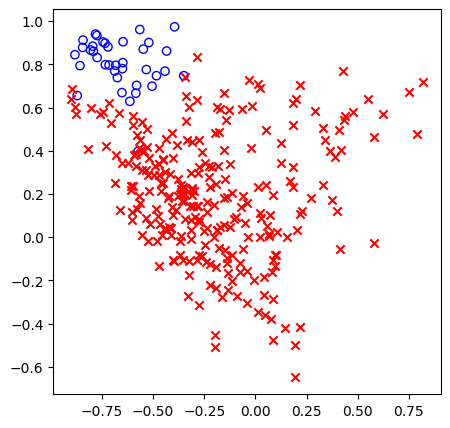

In [ ]:
fig, axs = plt.subplots(figsize=(5, 5))
plus1s = np.where(y == 1)[0]
minus1s = np.where(y == -1)[0]
Xplus1s = X[plus1s, :]
Xminus1s = X[minus1s, :]
axs.scatter(Xplus1s[:, 1], Xplus1s[:, 2], marker='o',
            color='blue', facecolors='none', label='1')
axs.scatter(Xminus1s[:, 1], Xminus1s[:, 2],
            marker='x', color='red', label='Not 1')

## Polynomial Transform Revisited - Using Legendre Polynomials
# Compute the Legendre Polynomials at a value of the input variable $x$

For non-negative integer $q$, let $L_q(x)$ denote the $q$-th degree Legendre polynomial

$L_0(x)=1$

$L_1(x)=x$

And for any $k\in\{2,3,\dots\}$

$L_k(x)=\frac{2k-1}{k}xL_{k-1}(x) - \frac{k-1}{k}L_{k-2}(x)$

See LFD Problem 4.3 for more details.

In [ ]:
def LegendrePolynomials(x, Q):
    '''
    Compute the values of Legendre polynomials with degrees 0, 1, 2, ..., Q at the input x
    Input:
        x: a real number
        Q: a positive integer
    Output:
        L: a list with Q+1 entries,
           where for any k=0, 1, ..., Q,
           L[k] is the value of the k-th order Legendre polynomial at x
    '''
    L = [1, x]

    for k in range(2, Q + 1):
        # Calculate the Legendre polynomial L_k(x) using the recurrence relation
        L_k = ((2 * k - 1) * x * L[k - 1] - (k - 1) * L[k - 2]) / k
        L.append(L_k)

    return L


### Compute the Legendre Polynomial Feature Transform

$\begin{bmatrix} 1\\ x_1\\ x_2\end{bmatrix} \to
\begin{bmatrix} 1\\ L_1(x_1)\\ L_1(x_2)\\ L_2(x_1)\\ L_1(x_1)L_1(x_2)\\ L_2(x_2)\\ L_3(x_1)\\ L_2(x_1)L_1(x_2)\\ L_1(x_1)L_2(x_2)\\ L_3(x_2)\\ \vdots \end{bmatrix}$

In [ ]:
from itertools import permutations, combinations_with_replacement
import numpy as np

def polynomialTransformLegendre(X, Q):
    '''
    Compute the Legendre Polynomial Feature Transform
    See LFD Example 3.3
    Input:
        X: A 2 dimensional N x d numpy array
           The n-th row X[n, :] contains features for the n-th example in the training set
           X[n, 0] = 1
           X[n, 1], ..., X[n, d] have values of features
        Q: The desired degree of polynomial
    Output:
        Z: A 2 dimensional N x d_tilde numpy array
           The n-th row Z[n, :] contains features corresponding to the Q-th order polynomial transform of X[n, :]
           Z[n, 0] = 1
           Z[n, 1], ..., Z[d_tilde] contain the transformed features
    Warning and TODO: This is a hack! Can we do better?
    '''
    N, d = X.shape
    if np.all(X[:, 0] == np.ones((N, 1))):
        X = X[:, 1:]
    N, d = X.shape

    '''
    Setup
    '''
    degrees = range(Q + 1)
    perms = permutations(range(d))
    perms = list(perms)
    combs = combinations_with_replacement(degrees, d)
    combs = list(combs)
    '''
    List feature names
    '''
    terms = []
    ftnames = []
    for c in combs:
        if np.sum(c) == 0:
            continue
        if np.sum(c) > Q:
            continue
        for p in perms:
            ftname = '*'.join(sorted([f'L_{c[col]}(x[{p[col]}])' for col in range(d)]))
            if ftname in ftnames:
                continue
            terms.append((c, p))
            ftnames.append(ftname)
    '''
    Compute features
    '''
    Z = []
    for n in range(N):
        row = [1]
        x = X[n, :]
        z = []
        Ls = [LegendrePolynomials(x[col], Q) for col in range(d)]
        for t in terms:
            (c, p) = t
            v = np.prod([Ls[p[i]][c[i]] for i in range(d)])
            z.append(v)
        z = [1] + z
        Z.append(z)
    Z = np.array(Z)
    return Z

# Question 5
##Task1

In [ ]:
Q = 10 #degree of polynomial

Z = polynomialTransformLegendre(X, Q)
print(f'Z shape {Z.shape}')
Ztest = polynomialTransformLegendre(Xtest, Q)
print(f'Ztest shape {Ztest.shape}')

Z shape (300, 66)
Ztest shape (8998, 66)


In [ ]:
# From Linear models ipynb

'''This function calculates the sign of the dot product between the feature
matrix X and the weight vector w to predict class labels.
The np.sign function ensures that the output is either -1 or 1,
depending on whether the dot product is negative or positive, which is common in binary classification tasks.
'''

def predictClassLinear(w, X):
    '''
    Input:
        w: a 2D (d+1) x 1 numpy array of weights for a linear hypothesis
        X: a 2D N x (d+1) numpy array
           The n-th row X[n, :] contains features for the n-th example in the training set
           X[n, 0] = 1
           X[n, 1], ..., X[n, d] have values of features
    Output:
        yhat: an N x 1 2 dimensional numpy array orf predictions
    '''
    yhat = np.sign(np.matmul(X, w))
    return yhat

In [ ]:
'''
Updated plotting routine to use Legendre Polynomial transform instead
'''

'''This function visualizes the decision boundary and data points for a binary classification task.
It generates a grid of points in the 2D space, performs a polynomial transform,
and plots the decision boundary.
Additionally, it plots data points for two classes ('1' and 'Not 1') and displays the plot with labels and a legend.'''

def plotNonLinearSeparator(w, X, y, Q=2, title=''):
    '''
    Plot the "effective" decision boundary and half spaces
    determined by a non-linear separator in 2D space
    which is picked from a linear model in higher dimensional space
    using the polynomial transform
    Input:
        w: a d x 1 2 dimensional numpy array of weights for a linear hypothesis
        X: a 2 dimensional N x d numpy array
           The n-th row X[n, :] contains features for the n-th example in the training set
           X[n, 0] = 1
           X[n, 1], ..., X[n, d] have values of features
        y: a 2 dimensional N x 1 numpy array
           y[i, 0] is the label associated with the i-th example
        Q: The desired degree of polynomial
        title: a string
    Output:
        No output
    '''
    fig, axs = plt.subplots(figsize=(6, 6))
    '''
    Plot separator
    '''
    pltx1s = np.linspace(-1, 1, 100)
    pltx2s = np.linspace(-1, 1, 100)
    pltX = np.array([[1, x, y] for x in pltx1s for y in pltx2s])

    # A function that performs the polynomial transform
    pltZ = polynomialTransformLegendre(pltX, Q=Q)

    # Make predictions for the decision boundary
    pltyhat = predictClassLinear(w, pltZ)

    # Separate data points into classes using the colormap
    pltx1s = pltX[:, 1].reshape((pltX.shape[0], 1))
    pltx2s = pltX[:, 2].reshape((pltX.shape[0], 1))
    cmap = ListedColormap(['lightcoral', 'lightskyblue'])
    axs.scatter(pltx1s, pltx2s, c=pltyhat, cmap=cmap)
    '''
    Plot data points
    '''
    plus1s = np.where(y == 1)[0]
    minus1s = np.where(y == -1)[0]
    Xplus1s = X[plus1s, :]
    Xminus1s = X[minus1s, :]
    axs.scatter(Xplus1s[:, 1], Xplus1s[:, 2], marker='o',
                color='blue', facecolors='none', label='1')
    axs.scatter(Xminus1s[:, 1], Xminus1s[:, 2],
                marker='x', color='red', label='Not 1')
    '''
    Finishing touches
    '''

    # Set plot limits and labels
    axs.set_xlim(-1, 1)
    axs.set_ylim(-1, 1)
    axs.set_xlabel('intensity')
    axs.set_ylabel('symmetry')
    axs.set_title(title)
    axs.legend()

    # Show the plot
    plt.show()

## Linear Regression with Regularization: The One Step $E_\text{aug}$ Minimizing Algorithm

Minimize the augmented error with weight decay regularization. See Lecture 11.

Given:

- $X$: $N\times d$ 'augmented' matrix of $N$ data points with $d$ features.

- $y$: $N\times 1$ vector of labels

- $\lambda$: Regularization parameter

Compute weights $w$ to represent a linear hypothesis which has minimum augmented error $E_{\text{aug}}(w)=E_{\text{in}}(w) + \lambda w^T w$. Here:
- $E_{\text{in}}(w)=\frac{1}{N}(w^TX^TXw-2w^TX^Ty+y^Ty)$ is the sum of squared errors of the predictions made by the linear hypothesis with weights $w$, whose predictions are given by the $N\times 1$ vector $\hat{y}=Xw$.
- $\lambda w^T w$ is the weight decay regularization term which penalizes a linear hypothesis with weights $w$ by $\lambda$ times the sum of squares of the components of the weights.

Output $w_\text{reg}\in\arg\min_{w\in\mathbb{R}^d}E_{\text{aug}}(w)$.

$w_{\text{reg}}\gets (X^TX + \lambda I)^{-1}X^T y$, if $X$ is invertible.

##### Tip: See <a href="https://numpy.org/doc/stable/reference/generated/numpy.identity.html#numpy-identity">numpy.identity()</a> to produce the identity matrix. You may continue to use <a href="https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html#numpy-linalg-pinv">numpy.linalg.pinv()</a> to compute the inverse of a matrix, even one which is invertible.

### Sum of Squared Errors

Given:

- $X$: $N\times d$ 'augmented' matrix of $N$ data points with $d$ features.

- $y$: $N\times 1$ vector of labels See Lecture 11.

$E_{X,y}(w)=\frac{1}{N}(w^TX^TXw-2w^TX^Ty+y^Ty)$ is the sum of squared errors of the predictions made by the linear hypothesis with weights $w$, whose predictions are given by the $N\times 1$ vector $\hat{y}=Xw$.

In [ ]:
def squaredError(w, X, y):
    '''
    point-wise sum of squared error (for regression)
    Input:
        w: a d x 1 2 dimensional numpy array
        X: an N x d 2 dimensional numpy array
        y: an N x 1 2 dimensional numpy array
    Output:
        error: sum of squared errors of hypothesis w on data points in X with true labels y
    '''
    N, d = X.shape
    yhat = np.matmul(X, w)  # Calculate predictions

    # Compute the squared error term
    squared_errors = (yhat - y) ** 2

    # Calculate the sum of squared errors
    error = (1/N) * np.sum(squared_errors)

    return error


### Linear Regression with Regularization

Given:

- $X$: $N\times d$ 'augmented' matrix of $N$ data points with $d$ features.

- $y$: $N\times 1$ vector of labels

- $\lambda$: Regularization parameter

Output $w_\text{reg}\in\arg\min_{w\in\mathbb{R}^d}E_{\text{aug}}(w)$, where $E_{\text{aug}}(w)=E_{\text{in}}(w) + \lambda w^T w$.

$w_{\text{reg}}\gets (X^TX + \lambda I)^{-1}X^T y$, if $X$ is invertible.

In [ ]:
def linearRegressionRegularized(X, y, lamda):
    '''
    Implements the one-step algorithm for Linear Regression
    Input:
        X: A 2 dimensional N x d numpy array
           The i-th row X[i, :] contains features for the i-th example in the training set
           X[i, 0] = 1
           X[i, 1], ... X[i, d] have values of features
        y: A 2 dimensional N x 1 numpy array
           y[i, 0] is the label associated with the i-th example
        lamda: a non-negative real number which controls the amount of regularization
    Output:
        w: weights with lowest error on the input training set X, y
    '''

    N, d = X.shape

    # Calculate the regularized weights using the one-step algorithm
    A = np.matmul(X.T, X) + lamda * np.identity(d)
    b = np.matmul(X.T, y)
    w = np.linalg.solve(A, b)

    return w


# Question 5
##Task 2

In [ ]:
lamda = 0
w_reg = linearRegressionRegularized(Z, y, lamda)

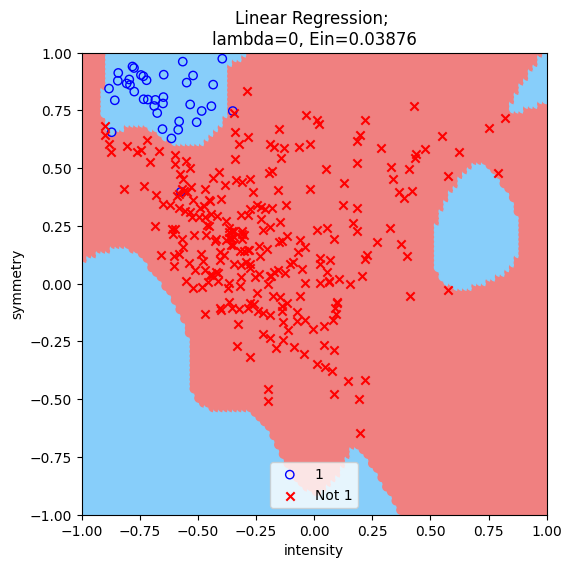

In [ ]:
Ein = np.round(squaredError(w_reg, Z, y), 5)
plotNonLinearSeparator(w_reg, X, y, Q=Q,
                           title=f'Linear Regression; \nlambda={lamda}, Ein={Ein}')

# Question 5
##Task 3

In [ ]:
lamda = 3
w_reg = linearRegressionRegularized(Z, y, lamda)

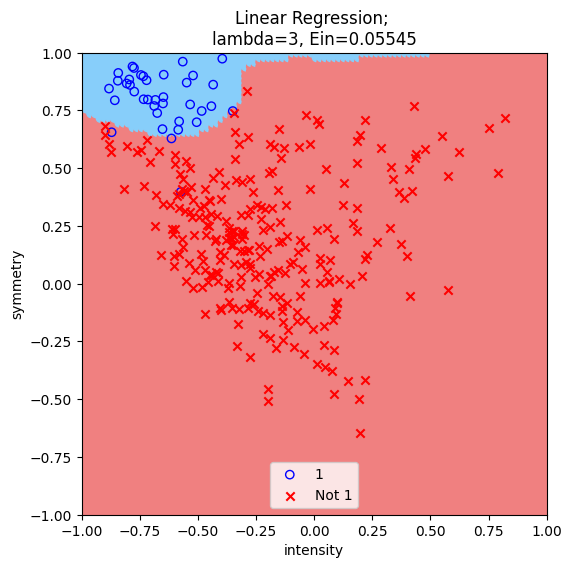

In [ ]:
Ein = np.round(squaredError(w_reg, Z, y), 5)
plotNonLinearSeparator(w_reg, X, y, Q=Q,
                           title=f'Linear Regression; \nlambda={lamda}, Ein={Ein}')

In [ ]:
lamda = 10
w_reg = linearRegressionRegularized(Z, y, lamda)

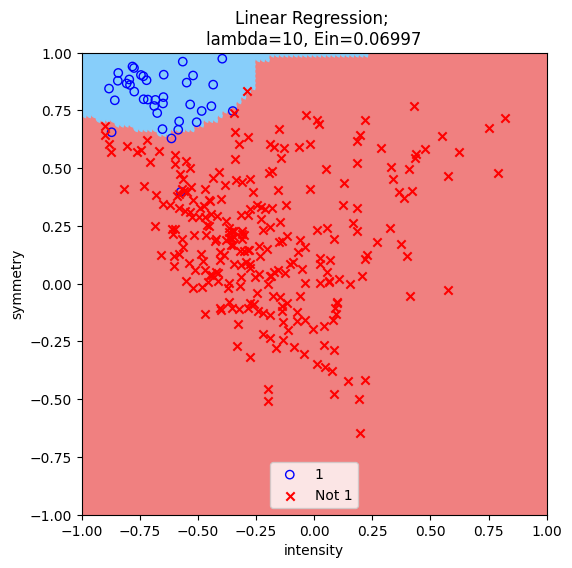

In [ ]:
Ein = np.round(squaredError(w_reg, Z, y), 5)
plotNonLinearSeparator(w_reg, X, y, Q=Q,
                           title=f'Linear Regression; \nlambda={lamda}, Ein={Ein}')

## Leave-One-Out Cross Validation

See Lectures 22 and 23

### Experiments with Leave-One-Out Cross Validation

### Experiments to Pick Regularization Parameter $\lambda$

Please try other values of $\lambda$ as well.

# Question 5
##Task 4

In [ ]:
def linearRegressionCVError(X, y, lamda):
    N, d = X.shape
    Ecv = 0
    for n in range(N):
        X_train = np.vstack([X[:n, :], X[n+1:, :]])
        y_train = np.vstack([y[:n, :], y[n+1:, :]])

        X_test = X[n:n+1, :]
        y_test = y[n:n+1, :]

        w = linearRegressionRegularized(X_train, y_train, lamda)

        Ecv += squaredError(w, X_test, y_test)

    Ecv /= N
    return Ecv

In [ ]:
lamda = 0
Ecv = linearRegressionCVError(X, y, lamda)
print(f'Linear Regression with Regularization with lambda={lamda}, Ecv = {Ecv}')

Linear Regression with Regularization with lambda=0, Ecv = 0.25598057361417664


In [ ]:
lamdas = [0, 0.01, 0.1, 1, 5, 10, 25, 50, 75, 100]
Ecvs = []
Etests = []

for lamda in lamdas:
    Ecv = linearRegressionCVError(Z, y, lamda)
    Ecvs.append(Ecv)

    w_reg = linearRegressionRegularized(Z, y, lamda)
    Etest = squaredError(w_reg, Ztest, ytest)
    Etests.append(Etest)
    print(f'Linear Regression with Regularization with lambda={lamda}, Ecv = {Ecv}, Etest = {Etest}')

Linear Regression with Regularization with lambda=0, Ecv = 59.12535988130602, Etest = 554.7471824050991
Linear Regression with Regularization with lambda=0.01, Ecv = 0.07351194328903848, Etest = 0.1307966605866893
Linear Regression with Regularization with lambda=0.1, Ecv = 0.06329776358431723, Etest = 0.1160955579859954
Linear Regression with Regularization with lambda=1, Ecv = 0.06403541718764742, Etest = 0.10770073704450285
Linear Regression with Regularization with lambda=5, Ecv = 0.07224899559937102, Etest = 0.10524670386226478
Linear Regression with Regularization with lambda=10, Ecv = 0.08118061382713532, Etest = 0.10747046360175373
Linear Regression with Regularization with lambda=25, Ecv = 0.10646785920962025, Etest = 0.12253696291903517
Linear Regression with Regularization with lambda=50, Ecv = 0.14534812040475287, Etest = 0.15486472120304343
Linear Regression with Regularization with lambda=75, Ecv = 0.18051993348290166, Etest = 0.187482127915091
Linear Regression with Regu

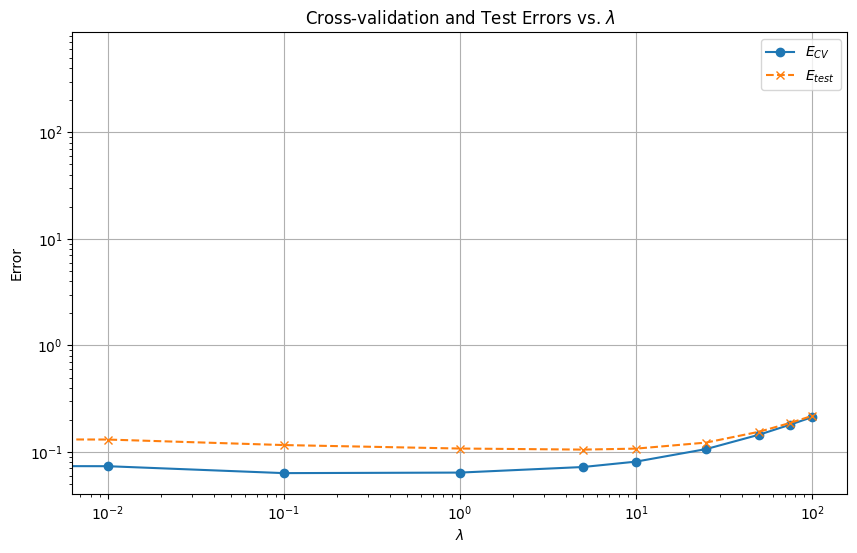

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(lamdas, Ecvs, label='$E_{CV}$', marker='o')
plt.plot(lamdas, Etests, label='$E_{test}$', linestyle='--', marker='x')
plt.xlabel('$\lambda$')
plt.ylabel('Error')
plt.xscale('log')
plt.yscale('log')
plt.title('Cross-validation and Test Errors vs. $\lambda$')
plt.legend()
plt.grid(True)
plt.show()

#Question 5
##Task 5

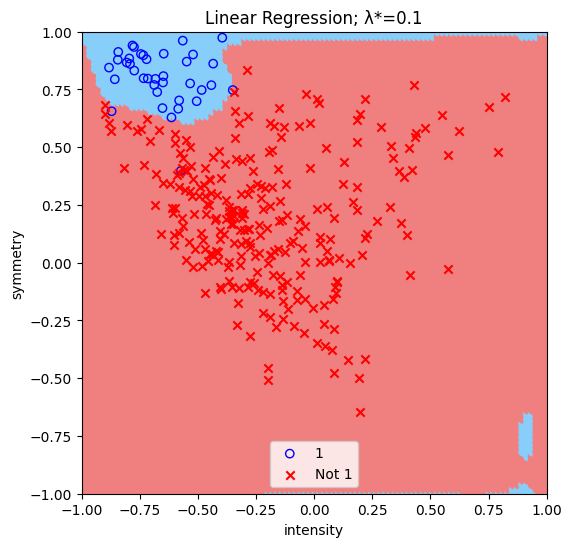

Best lambda (λ*): 0.1


In [ ]:
# Find the index of the λ value with the lowest cross-validation error (ECV)
best_lambda_index = np.argmin(Ecvs)

# Use the best lambda value
best_lambda = lamdas[best_lambda_index]

# Calculate the weights wlin(λ∗) using the best lambda
w_reg_best = linearRegressionRegularized(Z, y, best_lambda)

# Plot the decision boundary corresponding to the best weights
plotNonLinearSeparator(w_reg_best, X, y, Q=Q, title=f'Linear Regression; λ*={best_lambda}')

# Print the best lambda
print(f'Best lambda (λ*): {best_lambda}')


#Question 5
##Task 6

In [ ]:
import numpy as np

# Compute Eout(wlin(λ*))
Eout_best_lambda = squaredError(w_reg_best, Ztest, ytest)

# Calculate the size of the test set (Ntest)
Ntest = Ztest.shape[0]

# Calculate the 99% confidence interval using Hoeffding's inequality
delta = 0.01  # 1 - 99% confidence
confidence_interval = np.sqrt((1 / (2 * Ntest)) * np.log(2 / delta))

# Calculate the upper and lower bounds of the confidence interval
upper_bound = Eout_best_lambda + confidence_interval
lower_bound = Eout_best_lambda - confidence_interval

# Print the results
print(f'Eout(wlin(λ*)): {Eout_best_lambda}')
print(f'99% Confidence Interval for E_out: [{lower_bound}, {upper_bound}]')


Eout(wlin(λ*)): 0.1160955579859954
99% Confidence Interval for E_out: [0.09893699188410862, 0.13325412408788218]


In [ ]:
# Train a regularized linear regression model with the best λ on the full training data
w_star = linearRegressionRegularized(Z, y, best_lambda)

# Use the final hypothesis w_star to classify the test data
y_pred = predictClassLinear(w_star, Ztest)

# Initialize variables for error calculation
misclassified_ones = 0
total_ones = 0
misclassified_non_ones = 0
total_non_ones = 0

# Calculate classification error
for i in range(len(y_pred)):
    if ytest[i] == 1:
        total_ones += 1
        if y_pred[i] != 1:
            misclassified_ones += 1
    else:
        total_non_ones += 1
        if y_pred[i] != -1:
            misclassified_non_ones += 1



In [ ]:

# Calculate classification error rates
error_rate_ones = misclassified_ones / total_ones
error_rate_non_ones = misclassified_non_ones / total_non_ones

# Calculate overall classification error (Eout(g))
total_misclassified = misclassified_ones + misclassified_non_ones
total_samples = len(y_pred)
overall_error_rate = total_misclassified / total_samples

# Calculate 99% error bars
z_score = 2.576  # Z-score for 99% confidence interval
one_std_dev = np.sqrt(overall_error_rate * (1 - overall_error_rate) / total_samples)
error_bar = z_score * one_std_dev

print(f"Classification Error for 1s: {error_rate_ones:.4f}")
print(f"Classification Error for non-1s: {error_rate_non_ones:.4f}")
print(f"Overall Classification Error (Eout(g)): {overall_error_rate:.4f}")
print(f"99% Confidence Interval Error Bar: ±{error_bar:.4f}")

Classification Error for 1s: 0.1420
Classification Error for non-1s: 0.0164
Overall Classification Error (Eout(g)): 0.0336
99% Confidence Interval Error Bar: ±0.0049


#Question 5
##Task 7

In [ ]:
# Compute Etest using the best lambda and the separate test dataset
Etest = squaredError(w_reg_best, Ztest, ytest)

# Compute ECV using cross-validation, leave-one-out
Ecv = linearRegressionCVError(Z, y, best_lambda)

# Print both ECV and Etest
print(f'ECV(λ*): {Ecv}')
print(f'Etest(wlin(λ*)): {Etest}')


ECV(λ*): 0.06329776358431723
Etest(wlin(λ*)): 0.1160955579859954
